In [1]:
import pandas as pd
import numpy as np
import os

# Train_Df
train_df = pd.read_csv("train.csv", index_col=0)
test_df = pd.read_csv("test.csv",index_col=0)

In [3]:
train_df.head()

,target,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_497,feature_498,feature_499,feature_500,feature_501,feature_502,feature_503,feature_504,feature_505,feature_506
id,,,,,,,,,,,,,,,,,,,,,
0,0,C0,C0,C1,C5,C11,37.56,54.756667,54.756667,35.83,...,0,0,0,0,0,0,0,0,0,0
1,0,C0,C0,C3,C5,C1,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,0,C0,C0,C3,C5,C2,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,0,C0,C0,C1,C5,C1,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
4,1,C0,C0,C3,C3,C11,37.48,37.480000,37.161333,35.75,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test_df.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_497,feature_498,feature_499,feature_500,feature_501,feature_502,feature_503,feature_504,feature_505,feature_506
id,,,,,,,,,,,,,,,,,,,,,
5,C0,C0,C0,C5,C2,37.638,36.361667,42.688333,31.66,31.66,...,0,0,0,0,0,0,0,0,0,0
7,C0,C0,C3,C5,C11,32.540,32.540000,39.403333,30.82,30.82,...,0,0,0,0,0,0,0,0,0,0
9,C0,C0,C1,C5,C1,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
11,C0,C0,C3,C5,C2,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
14,C0,C0,C1,C5,C10,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


In [231]:
#Checking for any null values (% of missing values)
missing_values=train_df.isnull().sum().sort_values(ascending=False)*100/len(train_df)
missing_values = pd.DataFrame(missing_values,columns = ['Missing_Percent'])
#missing_values=train_df.apply(lambda x: x.isnull().sum()*100/len(train_df))
missing_values_test=test_df.isnull().sum().sort_values(ascending=False)*100/len(test_df)
missing_values_test = pd.DataFrame(missing_values_test,columns = ['Missing_Percent'])


In [232]:
missing_values.head(10)

,Missing_Percent
feature_193,100.000000
feature_198,100.000000
feature_196,100.000000
feature_197,100.000000
feature_83,98.320000
feature_75,70.297143
feature_76,70.297143
feature_195,63.890000
feature_5,63.680000
feature_8,63.680000


In [233]:
missing_values_test.head(10)

,Missing_Percent
feature_196,100.000000
feature_198,100.000000
feature_193,100.000000
feature_197,100.000000
feature_83,98.290000
feature_76,70.340000
feature_75,70.340000
feature_195,64.013333
feature_8,63.950000
feature_11,63.950000


In [234]:

#missing_values_test.index.to_list()[:5]
Drop_missingvalues = missing_values[(missing_values.Missing_Percent>80)].index.to_list()
Drop_missingvalues


['feature_193', 'feature_198', 'feature_196', 'feature_197', 'feature_83']

In [235]:
#Drop missing values > 80% from train_df
#Drop_missingvalues = missing_values[(missing_values.Missing_Percent>80)]

train_df=train_df.drop(Drop_missingvalues,axis=1)
train_df.head()

,target,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_497,feature_498,feature_499,feature_500,feature_501,feature_502,feature_503,feature_504,feature_505,feature_506
id,,,,,,,,,,,,,,,,,,,,,
0,0,C0,C0,C1,C5,C11,37.56,54.756667,54.756667,35.83,...,0,0,0,0,0,0,0,0,0,0
1,0,C0,C0,C3,C5,C1,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,0,C0,C0,C3,C5,C2,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,0,C0,C0,C1,C5,C1,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
4,1,C0,C0,C3,C3,C11,37.48,37.480000,37.161333,35.75,...,0,0,0,0,0,0,0,0,0,0


In [236]:
#Drop missing values > 80% from test_df
test_df=test_df.drop(['feature_196','feature_198','feature_193','feature_197','feature_83'],axis=1)
test_df.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_497,feature_498,feature_499,feature_500,feature_501,feature_502,feature_503,feature_504,feature_505,feature_506
id,,,,,,,,,,,,,,,,,,,,,
5,C0,C0,C0,C5,C2,37.638,36.361667,42.688333,31.66,31.66,...,0,0,0,0,0,0,0,0,0,0
7,C0,C0,C3,C5,C11,32.540,32.540000,39.403333,30.82,30.82,...,0,0,0,0,0,0,0,0,0,0
9,C0,C0,C1,C5,C1,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
11,C0,C0,C3,C5,C2,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
14,C0,C0,C1,C5,C10,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


In [237]:
drop=[]
for col in train_df.columns:
    #If column contains one unique value
    if (( train_df[col].nunique() <=1 )):
        #add to list
        drop.append(col)

train_df[drop]


#Add to drop list
Features_toDrop+=list(drop)

print(len(drop),' features added to drop list')

59  features added to drop list


In [238]:
#drop the features
Features_toDrop=list(set(Features_toDrop))
train_df.drop(Features_toDrop,axis=1,inplace=True)
test_df.drop(Features_toDrop,axis=1,inplace=True)

In [239]:
train_df.head()

,target,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_490,feature_492,feature_494,feature_496,feature_497,feature_499,feature_501,feature_503,feature_504,feature_506
id,,,,,,,,,,,,,,,,,,,,,
0,0,C0,C0,C1,C5,C11,37.56,54.756667,54.756667,35.83,...,0,0,0,0,0,0,0,0,0,0
1,0,C0,C0,C3,C5,C1,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,0,C0,C0,C3,C5,C2,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,0,C0,C0,C1,C5,C1,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
4,1,C0,C0,C3,C3,C11,37.48,37.480000,37.161333,35.75,...,0,0,0,0,0,0,0,0,0,0


In [240]:
#Datatypes
df= train_df.dtypes.value_counts()
numerical_datatype = train_df.select_dtypes(exclude=['object'])
categorical_datatype = train_df.select_dtypes(include=['object'])
numerical_datatype_test = test_df.select_dtypes(exclude=['object'])
categorical_datatype_test = test_df.select_dtypes(include=['object'])


In [241]:
categorical_datatype.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_16,feature_17,feature_18,feature_19,feature_20,...,feature_288,feature_289,feature_290,feature_291,feature_292,feature_293,feature_336,feature_337,feature_338,feature_371
id,,,,,,,,,,,,,,,,,,,,,
0,C0,C0,C1,C5,C11,C0,C60,C17795,C413,C3620,...,C130,C46,C22,C10,C7,C6,C0,C0,C0,C0
1,C0,C0,C3,C5,C1,C2,C50,C14050,C413,C2819,...,C105,C36,C18,C6,C3,C2,C0,C0,C0,C0
2,C0,C0,C3,C5,C2,C1,C76,C23471,C413,C4794,...,C105,C36,C18,C6,C3,C2,C0,C0,C0,C0
3,C0,C0,C1,C5,C1,C0,C58,C16929,C413,C3344,...,C83,C28,C13,C2,C1,C0,C0,C0,C0,C0
4,C0,C0,C3,C3,C11,C2,C48,C13941,C413,C2753,...,C93,C24,C11,C2,C1,C0,C0,C0,C0,C1


In [242]:
#Handling missing values
from statistics import mode
for col in numerical_datatype:
    train_df[col].fillna(train_df[col].median(),inplace=True)
for col in numerical_datatype_test:
    test_df[col].fillna(test_df[col].median(),inplace=True)  


for col in categorical_datatype:
    train_df[col].fillna(train_df[col].mode(col),inplace=True)
for col in categorical_datatype_test:
    test_df[col].fillna(test_df[col].mode(col),inplace=True) 


#categorical_datatype.notnull().any().to_list()
#numerical_datatype.isnull().sum().sort_values(ascending=False)



In [243]:
#Extracting columns containing dates

import re
datepattern= r'([0-9]{2}\/[0-9]{2}\/[0-9]{4})'
#train_dataset
mask=categorical_datatype.astype(str).apply(lambda x: x.str.match(datepattern).any())
mask_test=categorical_datatype_test.astype(str).apply(lambda x: x.str.match(datepattern).any())
datetime_format=categorical_datatype.loc[:,mask]
datetime_format
#test_dataset
mask_test=categorical_datatype_test.astype(str).apply(lambda x: x.str.match(datepattern).any())
mask_test=categorical_datatype_test.astype(str).apply(lambda x: x.str.match(datepattern).any())
datetime_format_test=categorical_datatype_test.loc[:,mask_test]
datetime_format_test
#for row, col in date_train:
#match_str = re.search(datepattern, date_train[row,col])
#match_str

,feature_191,feature_192,feature_194,feature_195,feature_199,feature_200,feature_201,feature_202,feature_203,feature_204
id,,,,,,,,,,
5,09/01/2017,09/01/2017,24/02/2017,NaN,09/01/2017,NaN,09/01/2017,NaN,NaN,NaN
7,01/08/2017,01/08/2017,04/12/2017,NaN,01/08/2017,01/08/2017,01/08/2017,NaN,NaN,NaN
9,03/10/2017,03/10/2017,NaN,NaN,03/10/2017,NaN,03/10/2017,NaN,NaN,NaN
11,20/11/2013,27/01/2015,04/02/2014,19/01/2015,27/01/2015,27/01/2015,27/01/2015,26/01/2015,26/01/2015,20/11/2013
14,23/01/2017,23/01/2017,NaN,NaN,23/01/2017,23/01/2017,23/01/2017,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
99981,01/09/2002,24/08/2013,NaN,NaN,01/06/2016,17/12/2015,17/12/2015,30/12/2015,30/12/2015,17/12/2015
99982,04/03/2016,04/03/2016,NaN,NaN,04/03/2016,04/03/2016,04/03/2016,04/01/2018,NaN,NaN
99992,20/03/2008,19/02/2014,12/09/2017,NaN,08/11/2016,25/02/2014,08/11/2016,25/02/2014,NaN,19/02/2014


In [244]:
#try forward fill and backward fill
#train
datetime_format = datetime_format.ffill().bfill().apply(pd.to_datetime,dayfirst=False)
# #test
datetime_format_test = datetime_format_test.ffill().bfill().apply(pd.to_datetime,dayfirst=False)

In [245]:
datetime_format.head()

,feature_191,feature_192,feature_194,feature_195,feature_199,feature_200,feature_201,feature_202,feature_203,feature_204
id,,,,,,,,,,
0,2017-11-10,2017-11-10,2017-09-11,2014-03-19,2017-11-10,2015-03-25,2017-11-10,2014-03-31,2014-03-31,2015-03-25
1,2015-03-25,2015-03-25,2017-09-11,2014-03-19,2017-02-04,2015-03-25,2015-03-25,2014-03-31,2014-03-31,2015-03-25
2,2015-01-27,2015-01-27,2017-05-13,2014-03-19,2016-03-24,2015-01-27,2015-01-27,2014-03-31,2014-03-31,2015-01-27
3,2014-05-02,2014-01-04,2017-05-13,2014-03-19,2014-01-04,2014-01-04,2014-01-04,2014-03-31,2014-03-31,2014-05-02
4,2009-07-20,2013-10-09,2017-02-14,2014-03-19,2013-10-09,2016-01-24,2013-10-09,2016-01-24,2013-10-09,2011-03-23


In [246]:
# #Splitting yyyy-mm-dd to yyyymm
# #train_dataset
# #datetime_format = datetime_format.astype(str).apply(lambda x : x.str.replace('-',''))
# #datetime_format
# #test_dateaset
# #datetime_format_test = datetime_format_test.astype(str).apply(lambda x : x.str.replace('-',''))
# #datetime_format_test

# #remove dd
#train_Dataset
for col in datetime_format:
    datetime_format[col]=datetime_format[col].dt.strftime('%Y/%m')
datetime_format

#test_Dataset
for col in datetime_format:
    datetime_format_test[col]=datetime_format_test[col].dt.strftime('%Y/%m')
datetime_format_test

,feature_191,feature_192,feature_194,feature_195,feature_199,feature_200,feature_201,feature_202,feature_203,feature_204
id,,,,,,,,,,
5,2017/09,2017/09,2017/02,2015/01,2017/09,2017/01,2017/09,2015/01,2015/01,2013/11
7,2017/01,2017/01,2017/04,2015/01,2017/01,2017/01,2017/01,2015/01,2015/01,2013/11
9,2017/03,2017/03,2017/04,2015/01,2017/03,2017/01,2017/03,2015/01,2015/01,2013/11
11,2013/11,2015/01,2014/04,2015/01,2015/01,2015/01,2015/01,2015/01,2015/01,2013/11
14,2017/01,2017/01,2014/04,2015/01,2017/01,2017/01,2017/01,2015/01,2015/01,2013/11
...,...,...,...,...,...,...,...,...,...,...
99981,2002/01,2013/08,2017/12,2017/10,2016/01,2015/12,2015/12,2015/12,2015/12,2015/12
99982,2016/04,2016/04,2017/12,2017/10,2016/04,2016/04,2016/04,2018/04,2015/12,2015/12
99992,2008/03,2014/02,2017/12,2017/10,2016/08,2014/02,2016/08,2014/02,2015/12,2014/02


In [247]:
datetime_format.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   feature_191  70000 non-null  object
 1   feature_192  70000 non-null  object
 2   feature_194  70000 non-null  object
 3   feature_195  70000 non-null  object
 4   feature_199  70000 non-null  object
 5   feature_200  70000 non-null  object
 6   feature_201  70000 non-null  object
 7   feature_202  70000 non-null  object
 8   feature_203  70000 non-null  object
 9   feature_204  70000 non-null  object
dtypes: object(10)
memory usage: 5.9+ MB


In [248]:
#Drop date-time features from categorical dataset ,Train_df
train_df=train_df.drop(['feature_191','feature_192','feature_194','feature_195','feature_199',
                                               'feature_200','feature_201','feature_202','feature_203','feature_204'],axis=1)
train_df.head()

,target,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_490,feature_492,feature_494,feature_496,feature_497,feature_499,feature_501,feature_503,feature_504,feature_506
id,,,,,,,,,,,,,,,,,,,,,
0,0,C0,C0,C1,C5,C11,37.56,54.756667,54.756667,35.83,...,0,0,0,0,0,0,0,0,0,0
1,0,C0,C0,C3,C5,C1,37.48,37.560000,37.030667,34.16,...,0,0,0,0,0,0,0,0,0,0
2,0,C0,C0,C3,C5,C2,37.48,37.560000,37.030667,34.16,...,0,0,0,0,0,0,0,0,0,0
3,0,C0,C0,C1,C5,C1,37.48,37.560000,37.030667,34.16,...,0,0,0,0,0,0,0,0,0,0
4,1,C0,C0,C3,C3,C11,37.48,37.480000,37.161333,35.75,...,0,0,0,0,0,0,0,0,0,0


In [249]:
#Drop date-time features from categorical dataset ,Train_df
test_df=test_df.drop(['feature_191','feature_192','feature_194','feature_195','feature_199',
                                               'feature_200','feature_201','feature_202','feature_203','feature_204'],axis=1)
test_df.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_490,feature_492,feature_494,feature_496,feature_497,feature_499,feature_501,feature_503,feature_504,feature_506
id,,,,,,,,,,,,,,,,,,,,,
5,C0,C0,C0,C5,C2,37.638,36.361667,42.688333,31.66,31.66,...,0,0,0,0,0,0,0,0,0,0
7,C0,C0,C3,C5,C11,32.540,32.540000,39.403333,30.82,30.82,...,0,0,0,0,0,0,0,0,0,0
9,C0,C0,C1,C5,C1,37.480,37.560000,37.110833,34.16,33.25,...,0,0,0,0,0,0,0,0,0,0
11,C0,C0,C3,C5,C2,37.480,37.560000,37.110833,34.16,33.25,...,0,0,0,0,0,0,0,0,0,0
14,C0,C0,C1,C5,C10,37.480,37.560000,37.110833,34.16,33.25,...,0,0,0,0,0,0,0,0,0,0


In [250]:
#Concatenate numerical , categorical, datetime dataframes to update train_df
train_df_1 = train_df.join(datetime_format)


In [251]:
train_df_1.head()

,target,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_191,feature_192,feature_194,feature_195,feature_199,feature_200,feature_201,feature_202,feature_203,feature_204
id,,,,,,,,,,,,,,,,,,,,,
0,0,C0,C0,C1,C5,C11,37.56,54.756667,54.756667,35.83,...,2017/11,2017/11,2017/09,2014/03,2017/11,2015/03,2017/11,2014/03,2014/03,2015/03
1,0,C0,C0,C3,C5,C1,37.48,37.560000,37.030667,34.16,...,2015/03,2015/03,2017/09,2014/03,2017/02,2015/03,2015/03,2014/03,2014/03,2015/03
2,0,C0,C0,C3,C5,C2,37.48,37.560000,37.030667,34.16,...,2015/01,2015/01,2017/05,2014/03,2016/03,2015/01,2015/01,2014/03,2014/03,2015/01
3,0,C0,C0,C1,C5,C1,37.48,37.560000,37.030667,34.16,...,2014/05,2014/01,2017/05,2014/03,2014/01,2014/01,2014/01,2014/03,2014/03,2014/05
4,1,C0,C0,C3,C3,C11,37.48,37.480000,37.161333,35.75,...,2009/07,2013/10,2017/02,2014/03,2013/10,2016/01,2013/10,2016/01,2013/10,2011/03


In [252]:
test_Df_1 = test_df.join(datetime_format_test)

In [253]:
test_Df_1.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_191,feature_192,feature_194,feature_195,feature_199,feature_200,feature_201,feature_202,feature_203,feature_204
id,,,,,,,,,,,,,,,,,,,,,
5,C0,C0,C0,C5,C2,37.638,36.361667,42.688333,31.66,31.66,...,2017/09,2017/09,2017/02,2015/01,2017/09,2017/01,2017/09,2015/01,2015/01,2013/11
7,C0,C0,C3,C5,C11,32.540,32.540000,39.403333,30.82,30.82,...,2017/01,2017/01,2017/04,2015/01,2017/01,2017/01,2017/01,2015/01,2015/01,2013/11
9,C0,C0,C1,C5,C1,37.480,37.560000,37.110833,34.16,33.25,...,2017/03,2017/03,2017/04,2015/01,2017/03,2017/01,2017/03,2015/01,2015/01,2013/11
11,C0,C0,C3,C5,C2,37.480,37.560000,37.110833,34.16,33.25,...,2013/11,2015/01,2014/04,2015/01,2015/01,2015/01,2015/01,2015/01,2015/01,2013/11
14,C0,C0,C1,C5,C10,37.480,37.560000,37.110833,34.16,33.25,...,2017/01,2017/01,2014/04,2015/01,2017/01,2017/01,2017/01,2015/01,2015/01,2013/11


In [254]:
categorical_datatype_list = [e for e in categorical_datatype_test
                        .columns]

categorical_datatype_list

['feature_0',
 'feature_1',
 'feature_2',
 'feature_3',
 'feature_4',
 'feature_16',
 'feature_17',
 'feature_18',
 'feature_19',
 'feature_20',
 'feature_21',
 'feature_22',
 'feature_23',
 'feature_24',
 'feature_27',
 'feature_28',
 'feature_29',
 'feature_30',
 'feature_31',
 'feature_32',
 'feature_33',
 'feature_34',
 'feature_41',
 'feature_42',
 'feature_54',
 'feature_58',
 'feature_97',
 'feature_133',
 'feature_134',
 'feature_135',
 'feature_152',
 'feature_163',
 'feature_164',
 'feature_165',
 'feature_185',
 'feature_186',
 'feature_189',
 'feature_191',
 'feature_192',
 'feature_194',
 'feature_195',
 'feature_199',
 'feature_200',
 'feature_201',
 'feature_202',
 'feature_203',
 'feature_204',
 'feature_205',
 'feature_239',
 'feature_240',
 'feature_241',
 'feature_242',
 'feature_243',
 'feature_244',
 'feature_246',
 'feature_247',
 'feature_250',
 'feature_251',
 'feature_270',
 'feature_271',
 'feature_272',
 'feature_273',
 'feature_274',
 'feature_275',
 'featur

In [255]:
numerical_datatype_list = [e for e in numerical_datatype_test
                        .columns]

numerical_datatype_list

['feature_5',
 'feature_6',
 'feature_7',
 'feature_8',
 'feature_9',
 'feature_10',
 'feature_11',
 'feature_12',
 'feature_13',
 'feature_14',
 'feature_15',
 'feature_25',
 'feature_26',
 'feature_35',
 'feature_36',
 'feature_37',
 'feature_38',
 'feature_39',
 'feature_40',
 'feature_43',
 'feature_44',
 'feature_45',
 'feature_46',
 'feature_47',
 'feature_48',
 'feature_49',
 'feature_50',
 'feature_51',
 'feature_52',
 'feature_53',
 'feature_56',
 'feature_57',
 'feature_59',
 'feature_60',
 'feature_61',
 'feature_62',
 'feature_63',
 'feature_64',
 'feature_65',
 'feature_66',
 'feature_67',
 'feature_68',
 'feature_69',
 'feature_70',
 'feature_71',
 'feature_72',
 'feature_73',
 'feature_74',
 'feature_75',
 'feature_76',
 'feature_77',
 'feature_78',
 'feature_79',
 'feature_80',
 'feature_81',
 'feature_82',
 'feature_84',
 'feature_85',
 'feature_86',
 'feature_87',
 'feature_88',
 'feature_89',
 'feature_90',
 'feature_91',
 'feature_92',
 'feature_93',
 'feature_94',


In [256]:
#Create a copy of datasets
train_copy=train_df_1.copy()
test_copy=test_Df_1.copy()
train_copy

,target,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_191,feature_192,feature_194,feature_195,feature_199,feature_200,feature_201,feature_202,feature_203,feature_204
id,,,,,,,,,,,,,,,,,,,,,
0,0,C0,C0,C1,C5,C11,37.560,54.756667,54.756667,35.83,...,2017/11,2017/11,2017/09,2014/03,2017/11,2015/03,2017/11,2014/03,2014/03,2015/03
1,0,C0,C0,C3,C5,C1,37.480,37.560000,37.030667,34.16,...,2015/03,2015/03,2017/09,2014/03,2017/02,2015/03,2015/03,2014/03,2014/03,2015/03
2,0,C0,C0,C3,C5,C2,37.480,37.560000,37.030667,34.16,...,2015/01,2015/01,2017/05,2014/03,2016/03,2015/01,2015/01,2014/03,2014/03,2015/01
3,0,C0,C0,C1,C5,C1,37.480,37.560000,37.030667,34.16,...,2014/05,2014/01,2017/05,2014/03,2014/01,2014/01,2014/01,2014/03,2014/03,2014/05
4,1,C0,C0,C3,C3,C11,37.480,37.480000,37.161333,35.75,...,2009/07,2013/10,2017/02,2014/03,2013/10,2016/01,2013/10,2016/01,2013/10,2011/03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,0,C0,C0,C3,C1,C11,37.480,37.560000,37.030667,34.16,...,2010/09,2014/01,2014/01,2014/01,2014/01,2014/02,2014/01,2017/06,2014/01,2011/10
99996,0,C0,C0,C5,C5,C2,39.398,35.022000,45.645000,30.83,...,2016/09,2016/09,2016/10,2014/01,2016/09,2016/09,2016/09,2017/06,2014/01,2011/10
99997,0,C0,C0,C3,C2,C11,37.480,37.560000,37.030667,34.16,...,2005/09,2015/07,2016/06,2015/07,2015/07,2016/09,2015/07,2017/06,2015/07,2013/01


In [257]:
#Creating a dataframe to find the cardinality (number of unique variables in a given feature) of both test and training datasets
def cardinality_find(df,ftype):
    tmp=[]
    for col in ftype:
        tmp.append( df[col].nunique() )

    cardinality_highest=pd.DataFrame({'Feature':ftype,'Distint_Values':tmp})
    return cardinality_highest.sort_values(by='Distint_Values',ascending=False)

In [259]:
#Cardinality dataframes for test and traning datasets

cardinality=cardinality_find(train_copy,categorical_datatype_list).head(10)

cardinality_test=cardinality_find(test_copy,categorical_datatype_list).head(10)


In [260]:
cardinality.head()

,Feature,Distint_Values
7,feature_18,15858
27,feature_133,7126
9,feature_20,5841
11,feature_22,2339
10,feature_21,2327


In [261]:
cardinality_test.head()


,Feature,Distint_Values
7,feature_18,10212
9,feature_20,5205
27,feature_133,4016
11,feature_22,991
10,feature_21,990


In [262]:

#Tagging 'other' to the variables in a feature which have the value count 1 (which are only repeated once)
#we are doing this to reduce the cardinality of a given categorical variable
#Here, we are also finding the 

for col in list(cardinality_find(train_copy,categorical_datatype_list).Feature):
        #get a list of categories which contain one value
        tmp=list(train_copy[col].value_counts()[train_copy[col].value_counts()<2].index)
        train_copy[col]=train_copy[col].apply(lambda x:'other' if x in tmp else x)
        
for col in list(cardinality_find(test_copy,categorical_datatype_list).Feature):
        #get a list of categories which contain one value
        tmp=list(test_copy[col].value_counts()[test_copy[col].value_counts()<2].index)
        test_copy[col]=test_copy[col].apply(lambda x:'other' if x in tmp else x)

In [263]:
#Checking for the other's in a sample column
newdf = train_copy.loc[(train_copy.feature_18 == "other")]
newdf.filter(['feature_18'])

newdf_test = test_copy.loc[(test_copy.feature_18 == "other")]
newdf_test.filter(['feature_18'])

,feature_18
id,
9,other
11,other
21,other
34,other
39,other
...,...
99920,other
99928,other
99945,other


### Backward Elimination ###

In [94]:
# # #Backward Elimination to drop insignificant features 
# # #Adding constant column of ones, mandatory for sm.OLS model
# import statsmodels.api as sm
#  X = train_copy.drop("target",1)   #Feature Matrix
# y = train_copy["target"]

#  X_1 = sm.add_constant(X)
# # # X_1
# # # #Fitting sm.OLS model
# # # model = sm.OLS(y,X[:, feature_index]).fit()
# # # model.pvalues

# # # using arrays

# # X_train_opt = np.append(arr = np.ones(()).astype(int), values = X_train)

In [264]:
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import StratifiedKFold, RepeatedStratifiedKFold
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report
import xgboost as xgb
from xgboost import XGBClassifier
%matplotlib inline

In [265]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [266]:
# convert the categorical values into numerical values
label_encoder = LabelEncoder()
for col in categorical_datatype_list:
    train_copy[col] = label_encoder.fit_transform(train_copy[col])
    test_copy[col] = label_encoder.fit_transform(test_copy[col])

In [267]:
train_copy

,target,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_191,feature_192,feature_194,feature_195,feature_199,feature_200,feature_201,feature_202,feature_203,feature_204
id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,1,5,3,37.560,54.756667,54.756667,35.83,...,255,119,128,50,95,126,142,73,71,126
1,0,0,0,3,5,1,37.480,37.560000,37.030667,34.16,...,223,87,128,50,86,126,110,73,71,126
2,0,0,0,3,5,4,37.480,37.560000,37.030667,34.16,...,221,85,124,50,75,124,108,73,71,124
3,0,0,0,1,5,1,37.480,37.560000,37.030667,34.16,...,213,73,124,50,49,112,96,73,71,116
4,1,0,0,3,3,3,37.480,37.480000,37.161333,35.75,...,155,70,121,50,46,136,93,95,66,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,0,0,0,3,1,3,37.480,37.560000,37.030667,34.16,...,169,73,84,48,49,113,96,112,69,85
99996,0,0,0,5,5,4,39.398,35.022000,45.645000,30.83,...,241,105,117,48,81,144,128,112,69,85
99997,0,0,0,3,2,3,37.480,37.560000,37.030667,34.16,...,109,91,113,66,67,144,114,112,87,100


In [268]:
test_copy

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_191,feature_192,feature_194,feature_195,feature_199,feature_200,feature_201,feature_202,feature_203,feature_204
id,,,,,,,,,,,,,,,,,,,,,
5,0,0,0,5,4,37.638,36.361667,42.688333,31.66,31.660000,...,244,117,120,60,92,136,136,76,75,101
7,0,0,3,5,3,32.540,32.540000,39.403333,30.82,30.820000,...,236,109,122,60,84,136,128,76,75,101
9,0,0,1,5,1,37.480,37.560000,37.110833,34.16,33.250000,...,238,111,122,60,86,136,130,76,75,101
11,0,0,3,5,4,37.480,37.560000,37.110833,34.16,33.250000,...,198,85,86,60,60,112,104,76,75,101
14,0,0,1,5,2,37.480,37.560000,37.110833,34.16,33.250000,...,236,109,86,60,84,136,128,76,75,101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99981,0,0,3,5,9,37.480,37.560000,37.110833,34.16,33.250000,...,56,68,130,93,72,123,115,87,86,126
99982,0,0,2,5,1,37.480,37.560000,37.110833,34.16,33.250000,...,227,100,130,93,75,127,119,115,86,126
99992,0,0,4,2,4,44.320,44.320000,43.959000,42.49,42.490000,...,130,74,130,93,79,101,123,65,86,104


In [269]:
# Normalizing the data using minmax scaler
# combine all the features into a single list
features = [*numerical_datatype_list, *categorical_datatype_list]
scaler = MinMaxScaler()
train_copy[features] = scaler.fit_transform(train_copy[features])
test_copy[features] = scaler.fit_transform(test_copy[features])

In [270]:
train_copy.head()

,target,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_191,feature_192,feature_194,feature_195,feature_199,feature_200,feature_201,feature_202,feature_203,feature_204
id,,,,,,,,,,,,,,,,,,,,,
0,0,0.0,0.0,0.2,1.0,0.272727,0.410436,0.198022,0.209931,0.693829,...,0.947955,0.894737,0.901408,0.46729,0.871560,0.736842,0.910256,0.557252,0.550388,0.741176
1,0,0.0,0.0,0.6,1.0,0.090909,0.410307,0.174447,0.179241,0.689286,...,0.828996,0.654135,0.901408,0.46729,0.788991,0.736842,0.705128,0.557252,0.550388,0.741176
2,0,0.0,0.0,0.6,1.0,0.363636,0.410307,0.174447,0.179241,0.689286,...,0.821561,0.639098,0.873239,0.46729,0.688073,0.725146,0.692308,0.557252,0.550388,0.729412
3,0,0.0,0.0,0.2,1.0,0.090909,0.410307,0.174447,0.179241,0.689286,...,0.791822,0.548872,0.873239,0.46729,0.449541,0.654971,0.615385,0.557252,0.550388,0.682353
4,1,0.0,0.0,0.6,0.6,0.272727,0.410307,0.174338,0.179467,0.693612,...,0.576208,0.526316,0.852113,0.46729,0.422018,0.795322,0.596154,0.725191,0.511628,0.458824


C:\Users\vidis\AppData\Local\Temp/ipykernel_11648/654400180.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = train_copy.drop("target",1)


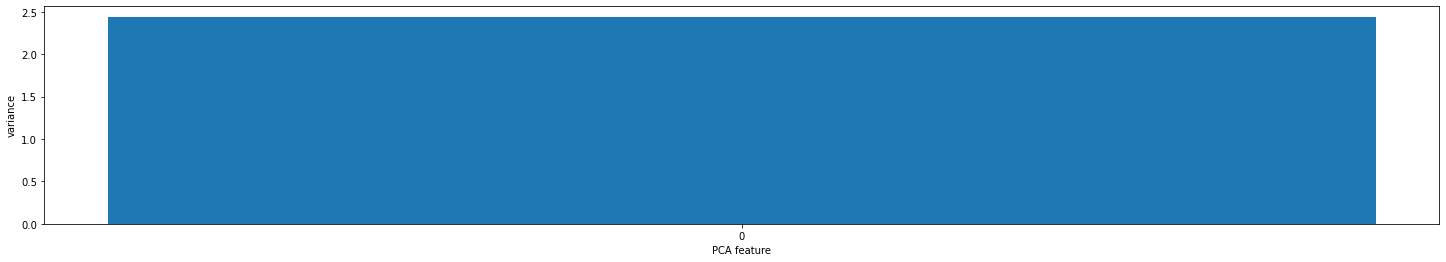

In [214]:
#PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Create scaler: scaler
scaler = MinMaxScaler()

X = train_copy.drop("target",1)
data = X.values
# Create a PCA instance: pca
pca = PCA(0.1)

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, pca)

# Fit the pipeline to 'samples'
pipeline.fit(data)
plt.figure(figsize=(25,4))

#Filter array with threshold variance > 0.01
# Create an empty list
#filter_arr = []

# go through each element in arr
#for element in pca.explained_variance_:
  # if the element is higher than 42, set the value to True, otherwise False:
 # if element > 0.1:
 #   filter_arr.append(True)
  #else:
   # filter_arr.append(False)
#features = range(len(newarr))
#features = len(newarr)
#newarr = pca.explained_variance_[filter_arr]
features = range(len(pca.explained_variance_))
#Plot the variance graph
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()


In [216]:
newarr

array([2.44072071])

In [184]:
# #PCA
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler
# from sklearn.pipeline import make_pipeline
# import matplotlib.pyplot as plt

# # Create scaler: scaler
# scaler = MinMaxScaler()

# X = train_copy.drop("target",1)
# data = X.values
# # Create a PCA instance: pca
# pca = PCA()

# # Create pipeline: pipeline
# pipeline = make_pipeline(scaler, pca)

# # Fit the pipeline to 'samples'
# pipeline.fit(data)

# # We can print out rotation matrix and variance associated with each
# # projected dimension

# vars = newarr
# #c_names = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']

# print('Variance:  Projected dimension')
# print('------------------------------')
# for idx, row in enumerate(pca.components_):
#     output = '{0:4.1f}%:    '.format(100.0 * vars[idx])
#     output += " + ".join("{0:5.2f} * {1:s}".format(val, name) \
#                       for val, name in zip(row, feature_list))
#     print(output)

C:\Users\vidis\AppData\Local\Temp/ipykernel_11648/3982544468.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = train_copy.drop("target",1)


Variance:  Projected dimension
------------------------------
244.1%:    -0.00 * feature_0 + -0.00 * feature_1 + -0.02 * feature_2 +  0.07 * feature_3 +  0.01 * feature_4 +  0.00 * feature_5 +  0.00 * feature_6 +  0.00 * feature_7 + -0.00 * feature_8 + -0.00 * feature_9 + -0.00 * feature_10 +  0.00 * feature_11 +  0.00 * feature_12 +  0.00 * feature_13 +  0.00 * feature_14 +  0.00 * feature_15 + -0.00 * feature_16 +  0.02 * feature_17 + -0.01 * feature_18 +  0.00 * feature_19 +  0.02 * feature_20 + -0.00 * feature_21 + -0.00 * feature_22 +  0.00 * feature_23 + -0.02 * feature_24 + -0.00 * feature_25 + -0.00 * feature_26 + -0.18 * feature_27 + -0.11 * feature_28 + -0.18 * feature_29 + -0.16 * feature_30 + -0.13 * feature_31 + -0.08 * feature_32 + -0.12 * feature_33 +  0.00 * feature_34 + -0.00 * feature_35 +  0.00 * feature_36 +  0.00 * feature_37 +  0.00 * feature_38 + -0.00 * feature_39 +  0.00 * feature_40 +  0.00 * feature_41 +  0.01 * feature_42 +  0.13 * feature_43 + -0.00 * featu

IndexError: index 96 is out of bounds for axis 0 with size 96

### XGBoost ###

In [1]:
# Modelling with xgboost
# setting up parameters
xgb_params = {
    'subsample': 0.8,
    'eta': 1e-3,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 4,
    'verbosity': 1
}

In [2]:
from tqdm import tqdm_notebook as tqdm

In [3]:
# XGB
N_SPLITS = 10
N_REPEATS = 5
folds = StratifiedKFold(n_splits=N_SPLITS, shuffle=True, random_state=1223)
repeats = RepeatedStratifiedKFold(n_splits=N_SPLITS, n_repeats=N_REPEATS, random_state=1223)
X, y = train_copy[features], train_copy['target']

predictions = []
for fold, (tr_idx, val_idx) in enumerate(tqdm(repeats.split(X, y),total=N_SPLITS*N_REPEATS)):
    X_train, y_train = X.iloc[tr_idx], y.iloc[tr_idx]
    X_valid, y_valid = X.iloc[val_idx], y.iloc[val_idx]
    dtrain = xgb.DMatrix(data=X_train, label=y_train)
    dvalid = xgb.DMatrix(data=X_valid, label=y_valid)
    model = xgb.train(
        xgb_params,
        dtrain=dtrain,
        evals=[(dtrain, 'train'), (dvalid, 'val')],
        early_stopping_rounds=100
    )
    
    predictions.append(model.predict(xgb.DMatrix(data=test_copy[features])))
#     model = XGBClassifier()
#     model.fit(
#         X_train, 
#         y_train,
#         eval_set=[(X_valid, y_valid)],
#         eval_metric='auc',
#         early_stopping_rounds=50,
#         verbose=200
#     )
    
    # checking for predictions
#     pred_tr = model.predict(xgb.DMatrix(data=X_train))
#     pred_val = model.predict(xgb.DMatrix(data=X_valid))
#     print(f"fold {fold+1}: Training AUC: {roc_auc_score(pred_tr, y_train)}")
#     print(f"fold {fold+1}: Validation AUC: {roc_auc_score(pred_val, y_valid)}\n")
    #gc.collect()
    del X_train, y_train, X_valid, y_valid

NameError: name 'StratifiedKFold' is not defined

In [275]:
predictions = sum(predictions)/(N_SPLITS*N_REPEATS)

In [276]:
predictions

array([0.49913186, 0.499164  , 0.49950555, ..., 0.49780643, 0.5005274 ,
       0.49626514], dtype=float32)

In [277]:
sample = pd.read_csv("sample_submission.csv")
sample.head()

,id,target
0,5,0.2982
1,7,0.2982
2,9,0.2982
3,11,0.2982
4,14,0.2982


In [278]:
sample['target'] = np.round(predictions, 4)

In [279]:
sample.to_csv('submission.csv', index=False)
pd.read_csv('submission.csv').head()

,id,target
0,5,0.4991
1,7,0.4992
2,9,0.4995
3,11,0.4962
4,14,0.4991


In [290]:
pip install lightgbm

In [281]:


import lightgbm as lgb

In [282]:
N_SPLITS = 10
N_REPEATS = 5
N_ESTIMATORS = 30000  # LightGB
EARLY_STOPPING_ROUNDS = 1000
VERBOSE = False
SEED = 42

In [283]:
lgb_params = {
    'objective': 'regression',
    'n_estimators': N_ESTIMATORS,
    'random_state': SEED,
    'learning_rate': 8e-3,
    'max_depth': 6,
    'subsample': 0.8,
    'subsample_freq': 1,
    'colsample_bytree': 0.6,
    'importance_type': 'gain',
}

In [293]:
N_SPLITS = 10
N_REPEATS = 5
folds = StratifiedKFold(n_splits=N_SPLITS, shuffle=True, random_state=SEED)
repeats = RepeatedStratifiedKFold(n_splits=N_SPLITS, n_repeats=N_REPEATS, random_state=SEED)
features =  numerical_datatype_list + categorical_datatype_list
X, y = train_copy[features], train_copy['target']

predictions = []
for fold, (tr_idx, val_idx) in enumerate(tqdm(repeats.split(X, y),total=N_SPLITS*N_REPEATS)):
    X_train, y_train = X.iloc[tr_idx], y.iloc[tr_idx]
    X_valid, y_valid = X.iloc[val_idx], y.iloc[val_idx]
    es = lgb.early_stopping(
        stopping_rounds=EARLY_STOPPING_ROUNDS,
        first_metric_only=True,
        verbose=VERBOSE,
    )

    le = lgb.log_evaluation(
        period=VERBOSE,
        show_stdv=VERBOSE
    )
    
    model = lgb.LGBMRegressor(**lgb_params)
    model.fit(
        X_train, 
        y_train,
        eval_set=[(X_valid, y_valid)],
        eval_names=['train', 'valid'],
        eval_metric='auc',
        callbacks=[es, le],
    )

C:\Users\vidis\AppData\Local\Temp/ipykernel_11648/1298074219.py:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for fold, (tr_idx, val_idx) in enumerate(tqdm(repeats.split(X, y),total=N_SPLITS*N_REPEATS)):


  0%|          | 0/50 [00:00<?, ?it/s]

In [320]:
lgb_oof = np.zeros(train_copy.shape[0])
lgb_pred = np.zeros(test_copy.shape[0])
lgb_oof[val_idx] = model.predict(X_valid)
lgb_pred += model.predict(test_copy[features])

auc = roc_auc_score(y_valid, lgb_oof[val_idx])



train_copy[f'lgb'] = lgb_oof
test_copy[f'lgb'] = lgb_pred

In [321]:
lgb_pred

array([0.45395608, 0.36691402, 0.36680941, ..., 0.33371361, 0.70502443,
       0.25182674])

In [315]:
sample = pd.read_csv("sample_submission.csv")
sample.head()

,id,target
0,5,0.2982
1,7,0.2982
2,9,0.2982
3,11,0.2982
4,14,0.2982


In [322]:
sample['target'] = np.round(lgb_pred, 4)

In [323]:
sample.to_csv('submission.csv', index=False)
pd.read_csv('submission.csv').head()

,id,target
0,5,0.4540
1,7,0.3669
2,9,0.3668
3,11,0.1658
4,14,0.3310
